In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = {
    'Ganador': ['Titán', 'Sacerdote', 'Olímpico', 'Faerie', 'Caballero', 'Defensor', 'Dragón', 'Faraón', 'Héroe', 'Sombra', 'Desafiante', 'Eterno'],
    'Olímpico': [109, 116, 131, 100, 68, 54, 40, 35, 34, 26, 20, 16],
    'Titán': [129, 130, 84, 82, 49, 50, 40, 34, 43, 31, 19, 14],
    'Sacerdote': [112, 135, 106, 98, 50, 40, 32, 30, 24, 24, 14, 17],
    'Caballero': [110, 81, 84, 61, 116, 45, 59, 21, 22, 20, 25, 26],
    'Defensor': [80, 84, 87, 60, 45, 78, 43, 31, 28, 28, 20, 10],
    'Dragón': [101, 73, 74, 55, 35, 42, 52, 26, 30, 30, 20, 14],
    'Faerie': [106, 66, 70, 81, 42, 53, 27, 33, 12, 27, 13, 12],
    'Total': [971, 903, 852, 725, 546, 521, 387, 304, 276, 266, 183, 175]
}

## Hay razas sin sus respectivos oponentes

In [19]:
# Original data (wins) - 2024
data = {
    'Raza': ['Titán', 'Sacerdote', 'Olímpico', 'Faerie', 'Caballero', 'Defensor', 'Dragón'],
    'Olímpico': [109, 116, 131, 100, 68, 54, 40],
    'Titán': [129, 130, 84, 82, 49, 50, 40],
    'Sacerdote': [112, 135, 106, 98, 50, 40, 32],
    'Caballero': [110, 81, 84, 61, 116, 45, 59],
    'Defensor': [80, 84, 87, 60, 45, 78, 43],
    'Dragón': [101, 73, 74, 55, 35, 42, 52],
    'Faerie': [106, 66, 70, 81, 42, 53, 27]
}

# Create DataFrame
df = pd.DataFrame(data)
df = df.set_index('Raza')

# Reshape the data to long format
df_long = df.reset_index().melt(id_vars=['Raza'], var_name='Opponent', value_name='Wins')
df_long['Losses'] = df_long.apply(lambda row: df.loc[row['Opponent'], row['Raza']], axis=1)
df_long['Total_Battles'] = df_long['Wins'] + df_long['Losses']
df_long['Loss_Rate'] = df_long['Losses'] / df_long['Total_Battles']
df_long['Win_Rate'] = df_long['Wins'] / df_long['Total_Battles']

print("Refined dataset:")
print(df_long.head(10))

# Basic statistical summary
print("\nBasic Statistical Summary:")
print(df_long.groupby('Raza')[['Win_Rate', 'Loss_Rate']].agg(['mean', 'std', 'min', 'max']))

Refined dataset:
        Raza  Opponent  Wins  Losses  Total_Battles  Loss_Rate  Win_Rate
0      Titán  Olímpico   109      84            193   0.435233  0.564767
1  Sacerdote  Olímpico   116     106            222   0.477477  0.522523
2   Olímpico  Olímpico   131     131            262   0.500000  0.500000
3     Faerie  Olímpico   100      70            170   0.411765  0.588235
4  Caballero  Olímpico    68      84            152   0.552632  0.447368
5   Defensor  Olímpico    54      87            141   0.617021  0.382979
6     Dragón  Olímpico    40      74            114   0.649123  0.350877
7      Titán     Titán   129     129            258   0.500000  0.500000
8  Sacerdote     Titán   130     112            242   0.462810  0.537190
9   Olímpico     Titán    84     109            193   0.564767  0.435233

Basic Statistical Summary:
           Win_Rate                               Loss_Rate            \
               mean       std       min       max      mean       std   
Raza  

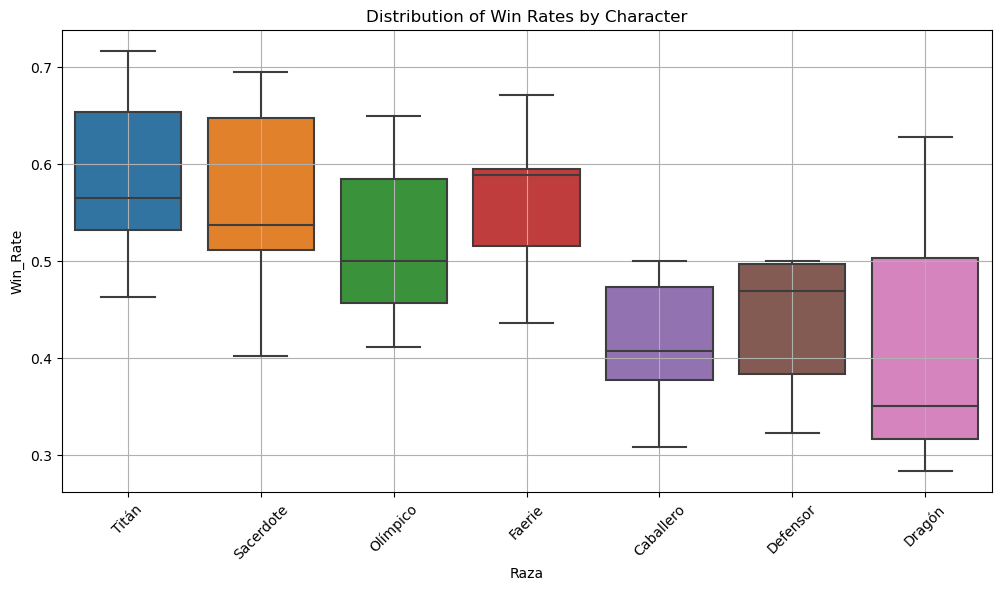

In [16]:
# Box plot of Win Rates by Character
plt.figure(figsize=(12, 6))
sns.boxplot(x='Raza', y='Win_Rate', data=df_long)
plt.title('Distribution of Win Rates by Character')
plt.xticks(rotation=45)
plt.grid()
plt.show()

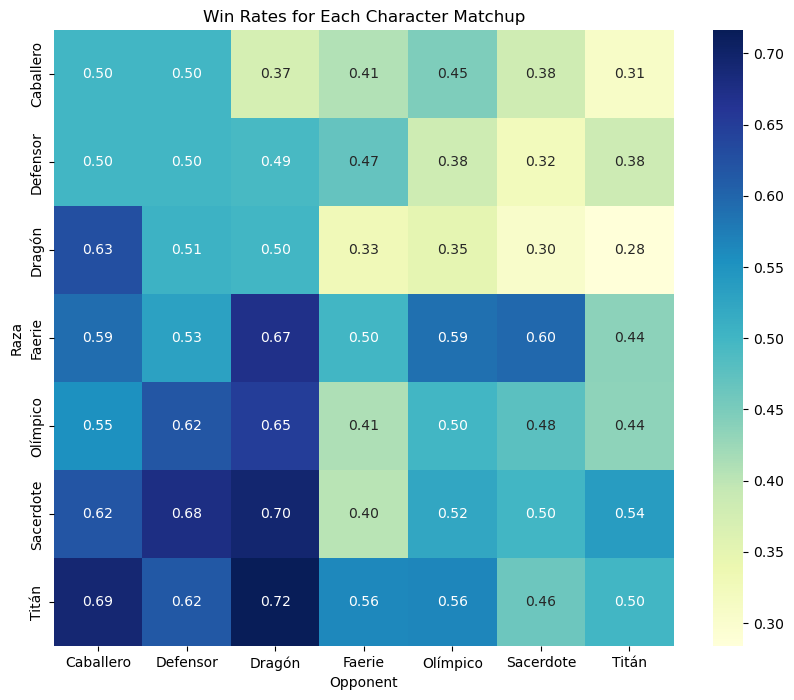

In [12]:
# Heatmap of Win Rates
pivot_win_rates = df_long.pivot(index='Raza', columns='Opponent', values='Win_Rate')
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_win_rates, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Win Rates for Each Character Matchup')
plt.show()